Confusion Matrix:
 [[64  4]
 [ 3 29]]
Accuracy: 0.93


C:\Users\Dell\AppData\Local\Temp\ipykernel_25064\80010611.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


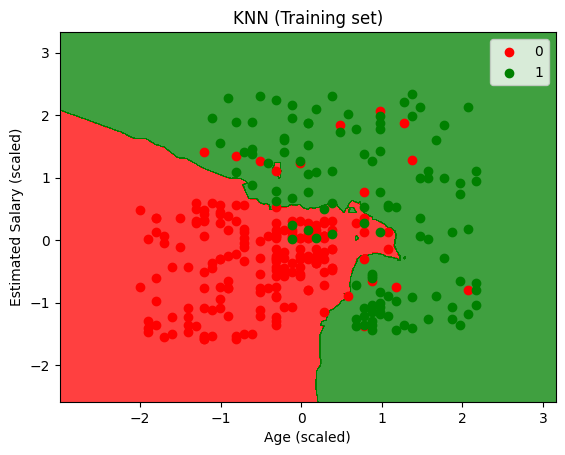

C:\Users\Dell\AppData\Local\Temp\ipykernel_25064\80010611.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


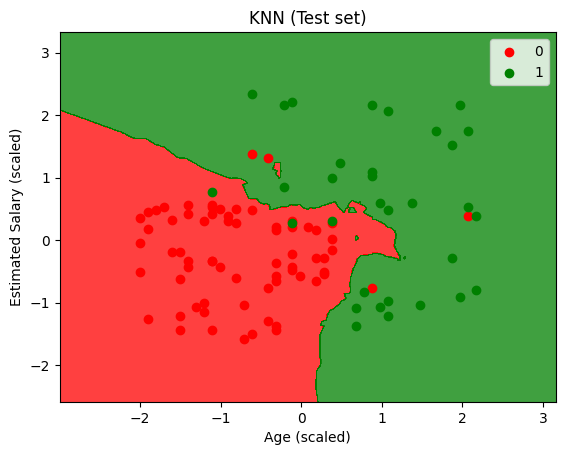

In [9]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Step 2: Load dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2]].values   # Age, Estimated Salary
y = dataset.iloc[:, 3].values        # Purchased (0/1)

# Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Step 4: Feature scaling (CRUCIAL for KNN)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 5: Train KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance
knn.fit(X_train, y_train)

# Step 6: Predictions + Accuracy
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 7: Decision Boundary Function
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
        np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
    )
    plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel("Age (scaled)")
    plt.ylabel("Estimated Salary (scaled)")
    plt.legend()
    plt.show()

# Step 8: Plot Decision Boundaries
plot_decision_boundary(X_train, y_train, "KNN (Training set)")
plot_decision_boundary(X_test, y_test, "KNN (Test set)")


In [10]:
print(sc.mean_)
print(sc.scale_)


[3.81266667e+01 6.95833333e+04]
[1.00977203e+01 3.44909127e+04]


In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [12]:
print(classifier.coef_)
print(classifier.intercept_)

[[1.60291291 0.97138722]]
[-0.76862169]


In [13]:
#saving them as variables so we can import them
weights=classifier.coef_
bias=classifier.intercept_

In [14]:
#writing func to make .h file to import on sifive
with open("svm_model.h", "w") as f:
    f.write(f"#define NUM_CLASSES {weights.shape[0]}\n")
    f.write(f"#define NUM_FEATURES {weights.shape[1]}\n\n")

    f.write("double weights[NUM_CLASSES][NUM_FEATURES] = {\n")
    for row in weights:
        f.write("    {" + ", ".join(f"{v:.10f}" for v in row) + "},\n")
    f.write("};\n\n")

    f.write("double bias[NUM_CLASSES] = {" + ", ".join(f"{b:.10f}" for b in bias) + "};\n")

print("✅ Exported SVM model to svm_model.h")


✅ Exported SVM model to svm_model.h


In [15]:
mean=sc.mean_
scale=sc.scale_

with open("scaler.h", "w") as f:
    f.write(f"#define NUM_FEATURES {len(mean)}\n\n")

    f.write("double mean[NUM_FEATURES] = {\n")
    f.write("    "+", ".join(f"{m:.10f}" for m in mean) + "\n};\n\n")

    f.write("double scale[NUM_FEATURES] = {\n")
    f.write("    "+", ".join(f"{s:.10f}" for s in scale) + "\n};\n")
print("✅ Exported scaler parameters to scaler.h")

✅ Exported scaler parameters to scaler.h


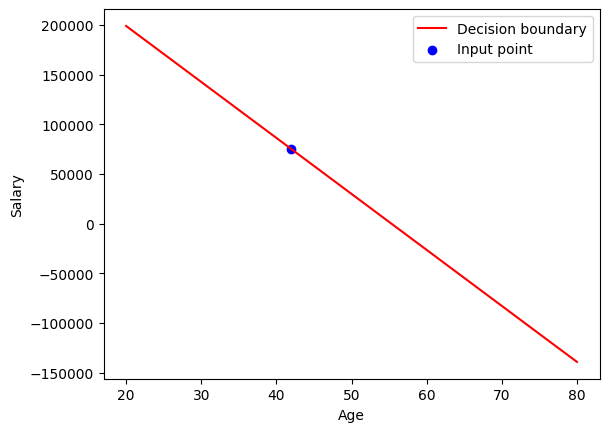

In [18]:

import numpy as np
import matplotlib.pyplot as plt


weights = [1.6029129051, 0.9713872195]
bias = -0.7686216858


mean = [38.1266666667, 69583.3333333333]
scale = [10.0977203148, 34490.9126518211]


input_point = [42, 75000]

#decision boundary in original space
x1_vals = np.linspace(20, 80, 100)
x2_vals = (-(scale[1]/weights[1]) *
           (weights[0] * (x1_vals - mean[0]) / scale[0] + bias)
           + mean[1])


plt.plot(x1_vals, x2_vals, 'r-', label="Decision boundary")
plt.scatter(input_point[0], input_point[1], c='blue', marker='o', label="Input point")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()



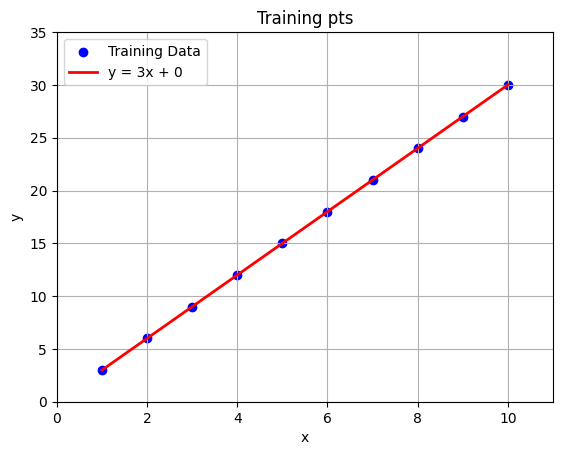

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Training data
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30])

# Learned weights
m = 3
c = 0

# Prediction line
x_line = np.linspace(min(x_train), max(x_train), 100)
y_line = m * x_line + c

# Plot training data
plt.scatter(x_train, y_train, color="blue", label="Training Data")

# Plot regression line
plt.plot(x_line, y_line, color="red", linewidth=2, label=f"y = {m}x + {c}")

# Axis limits for clarity
plt.xlim(0, 11)
plt.ylim(0, 35)

# Labels & title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training pts")
plt.legend()
plt.grid(True)
plt.show()


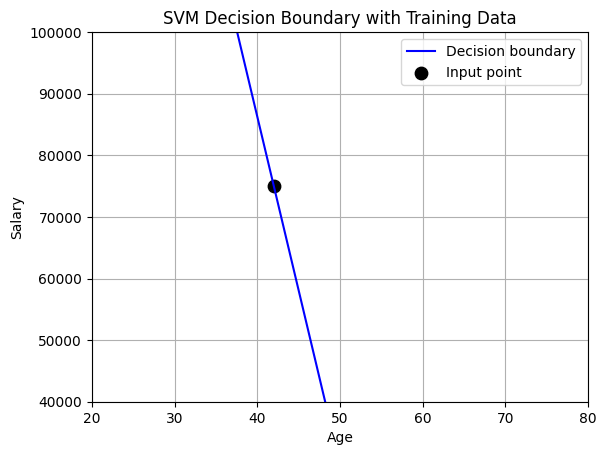

In [21]:
import numpy as np
import matplotlib.pyplot as plt

weights = [1.6029129051, 0.9713872195]
bias = -0.7686216858


mean = [38.1266666667, 69583.3333333333]
scale = [10.0977203148, 34490.9126518211]


train_data = np.array([
    [19,9000],
    [35, 20000],
    [32 ,150000],
    [18,82000],
    [47,25000],
    [27,570000]
])
train_labels = [0, 0,1,0,1,0]  


input_point = [42, 75000]

# Decision boundary in original feature space
x1_vals = np.linspace(20, 80, 200)
x2_vals = (-(scale[1]/weights[1]) *
           (weights[0] * (x1_vals - mean[0]) / scale[0] + bias)
           + mean[1])

# Plot
for i, point in enumerate(train_data):
    color = "red" if train_labels[i] == 1 else "green"
    plt.scatter(point[0], point[1], c=color, marker='x')

plt.plot(x1_vals, x2_vals, 'b-', label="Decision boundary")
plt.scatter(input_point[0], input_point[1], c='black', marker='o', s=80, label="Input point")

plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("SVM Decision Boundary with Training Data")
plt.xlim(20, 80)
plt.ylim(40000, 100000)
plt.legend()
plt.grid(True)
plt.show()
